#Importing important libraries.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime as dt
import chart_studio.plotly as py
import plotly as pt
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

#DATA COLLECTION

In [2]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
#Dropping missing values
df.dropna()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
#Finding no. of null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
df.dtypes


Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [8]:
df.shape

(267, 9)

In [9]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [10]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [11]:
df['Frequency'].unique()

array([' M'], dtype=object)

In [12]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [13]:
df.drop(columns='Frequency',inplace=True)
df.head()

,States,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74


#EXPLORATORY DATA ANALYSIS

In [14]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day']=df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year']=df['Date'].dt.year


In [15]:
df.head()

,States,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Day,Month,Year
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74,31,1,2020
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74,29,2,2020
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74,31,3,2020
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74,30,4,2020
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74,31,5,2020


In [16]:
df_region=df[['Region','Estimated Unemployment Rate']]
df_region

,Region,Estimated Unemployment Rate
0,South,5.48
1,South,5.83
2,South,5.79
3,South,20.51
4,South,17.43
...,...,...
262,East,7.29
263,East,6.83
264,East,14.87
265,East,9.35


In [17]:
df_r=df_region.groupby('Region').mean().reset_index()
df_r

,Region,Estimated Unemployment Rate
0,East,13.916000
1,North,15.889620
2,Northeast,10.950263
3,South,10.454667
4,West,8.239000


<Axes: xlabel='Region', ylabel='Estimated Unemployment Rate'>

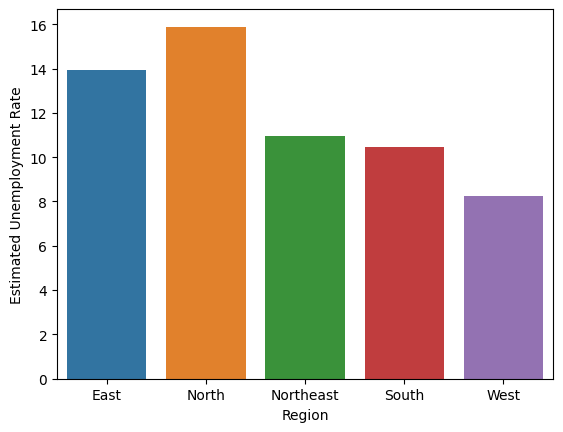

In [18]:
sns.barplot(data=df_r,x='Region',y='Estimated Unemployment Rate')

                       From above barplot, North region of India has highest Unemployment Rate in 2020.

In [19]:
df_state=df[['States','Estimated Unemployment Rate']]
df_s=df_state.groupby('States').mean().reset_index()
df_s

,States,Estimated Unemployment Rate
0,Andhra Pradesh,8.664000
1,Assam,4.856000
2,Bihar,19.471000
3,Chhattisgarh,7.819000
4,Delhi,18.414000
5,Goa,12.167000
6,Gujarat,6.376000
7,Haryana,27.477000
8,Himachal Pradesh,16.065000
9,Jammu & Kashmir,16.477778


<Axes: xlabel='Estimated Unemployment Rate', ylabel='States'>

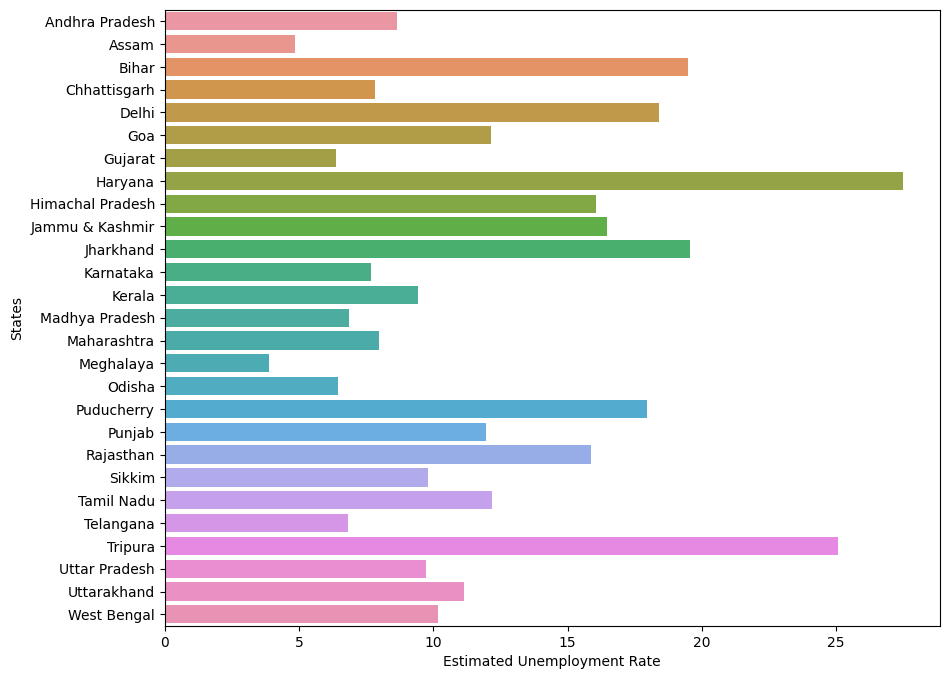

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df_s,x='Estimated Unemployment Rate',y='States',ax=ax)

                                  In 2020,highest unemployment rate is found in Haryana.

In [21]:
df_month=df[['Month','Estimated Unemployment Rate']]
df_month

,Month,Estimated Unemployment Rate
0,1,5.48
1,2,5.83
2,3,5.79
3,4,20.51
4,5,17.43
...,...,...
262,6,7.29
263,7,6.83
264,8,14.87
265,9,9.35


<Axes: xlabel='Estimated Unemployment Rate', ylabel='Count'>

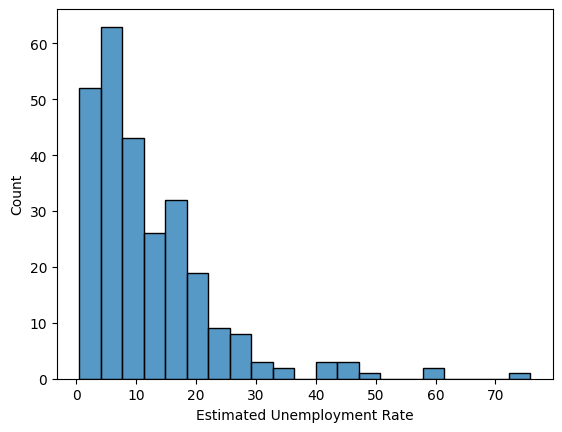

In [22]:
sns.histplot(df_month,x='Estimated Unemployment Rate')

<Axes: >

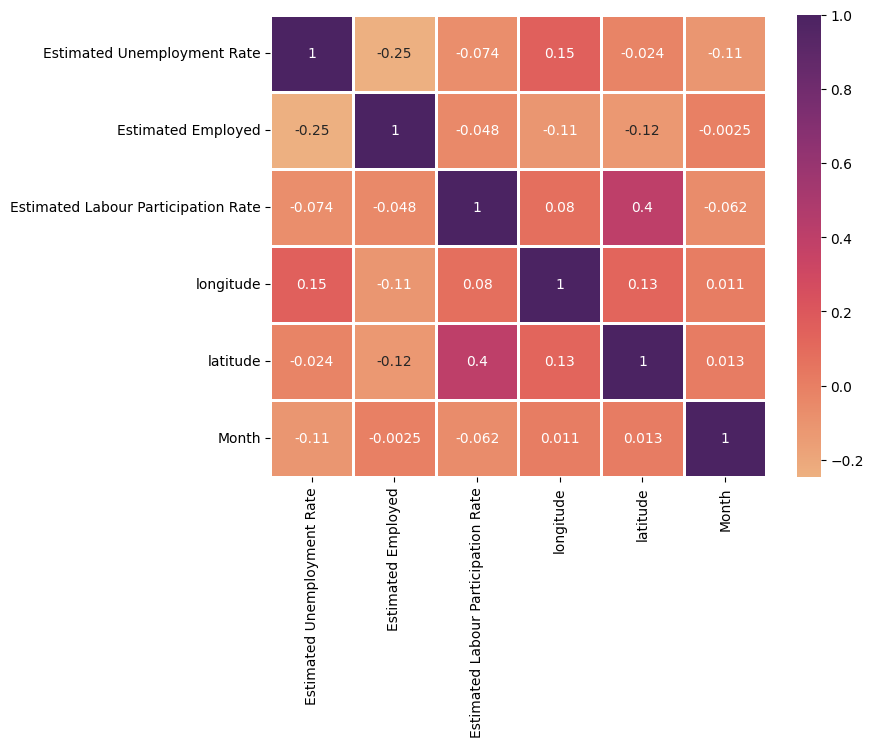

In [23]:
plt.figure(figsize=(8,6))
df_h=df.drop(['States','Date','Region','Day','Year'],inplace=False,axis=1)
df_h=df_h.corr()
sns.heatmap(df_h,annot=True,cmap='flare',linecolor='w',linewidth=1)

df_m=df_month.groupby('Month').mean().reset_index()
df_m

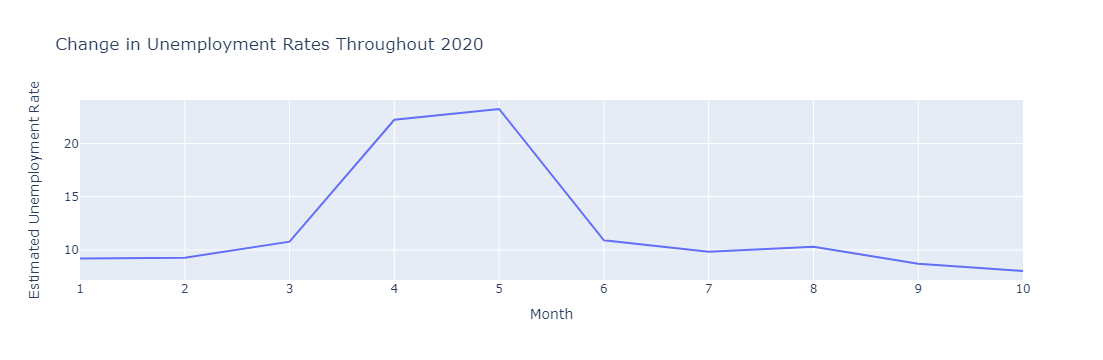

In [25]:
import plotly.express as px
fig = px.line(df_m,x='Month',y='Estimated Unemployment Rate', title='Change in Unemployment Rates Throughout 2020')
fig.show()

                                     In month May, Unemployment rate had hit its highest value.

PERCENTAGE CHANGE OF UNEMPLOYMENT AFTER LOCKDOWN

In [26]:
lockdown = df[(df['Month']>= 4) & (df['Month'] <=7)]
before= df[(df['Month'] >= 1) & (df['Month'] <=4)]
df_lockdown = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
df_before = before.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
df_lockdown['Unemployment Rate before lockdown'] = df_before['Estimated Unemployment Rate']
df_lockdown.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
df_lockdown.head()

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [27]:
percent_change=round((df_lockdown['Unemployment Rate after lockdown']-df_lockdown['Unemployment Rate before lockdown'])/df_lockdown['Unemployment Rate before lockdown'],3)
percent_change.head()

0    0.319
1    0.003
2    0.485
3    0.325
4    0.376
dtype: float64

In [28]:
d={'percent':percent_change}
df_change=pd.DataFrame(data=d)
df_change.head()

,percent
0,0.319
1,0.003
2,0.485
3,0.325
4,0.376


In [56]:
df1=pd.concat([df_lockdown,df_change],axis=1)
df1

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown,percent
0,Andhra Pradesh,12.397500,9.4025,0.319
1,Assam,6.245000,6.2250,0.003
2,Bihar,30.802500,20.7425,0.485
3,Chhattisgarh,9.602500,7.2450,0.325
4,Delhi,24.360000,17.6975,0.376
5,Goa,15.397500,7.5650,1.035
6,Gujarat,8.965000,9.3225,-0.038
7,Haryana,30.780000,28.5950,0.076
8,Himachal Pradesh,16.732500,13.6575,0.225
9,Jammu & Kashmir,15.846667,19.1200,-0.171


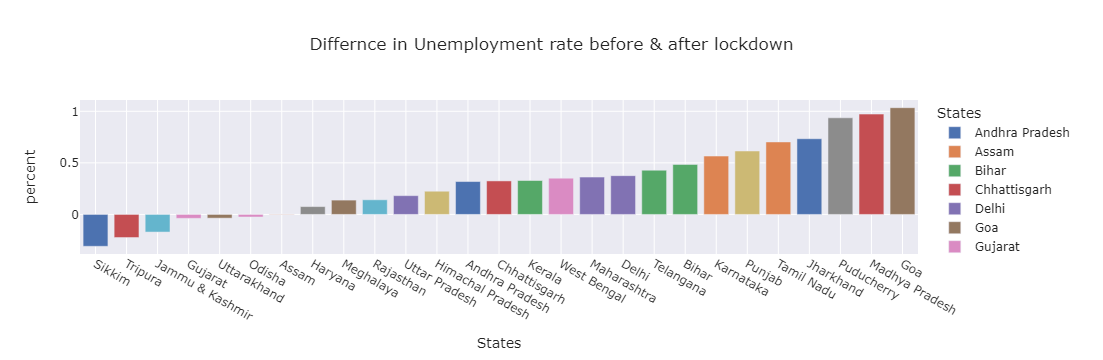

<Figure size 1000x700 with 0 Axes>

In [57]:
import plotly.express as px
plt.figure(figsize =(10, 7))
fig = px.bar(df1, x='States', y='percent', color='States', title='Differnce in Unemployment rate before & after lockdown', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()

-Sikkim had lower unemployment rate after lockdown compared to what was before lockdown.
-Goa had highest unemployment rate after lockdown.
-Assam had minimum affect on unemployment rate due to lockdown.